# Librerias

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#Data viz
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.svm import SVC
seed = 42

# Lectura

In [3]:
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')

y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

# Support Vector Machines

Separamos en distintas optimizaciones por recursos computacionales

### Kernel Linear

In [4]:
param_grid = {
    'C': [0.01, 0.05, 0.1, 0.2, 0.5, 1]
}

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_svm = GridSearchCV(SVC(random_state = seed
                                  , kernel='linear'
                                  )
                            ,param_grid=param_grid
                            ,scoring="roc_auc"
                            ,cv=kfold
                            ,n_jobs=-1
                            ,verbose=0
                            ,return_train_score=True)

grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(kernel='linear', random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.2, 0.5, 1]},
             return_train_score=True, scoring='roc_auc')

In [5]:
print(f'Mejor modelo cuenta con parametros: {grid_search_svm.best_estimator_}')
print(f'El AUC es de: {round(grid_search_svm.best_score_,3)}')

Mejor modelo cuenta con parametros: SVC(C=0.1, kernel='linear', random_state=42)
El AUC es de: 0.851


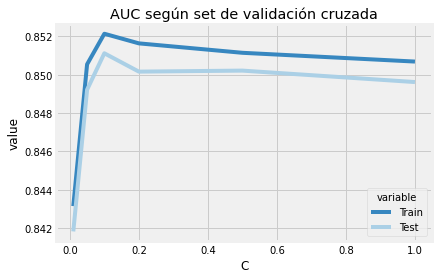

In [11]:
C_list = [i for i in grid_search_svm.cv_results_['param_C'].data]


mean_test_score_list = list(grid_search_svm.cv_results_['mean_test_score'])
mean_train_score_list = list(grid_search_svm.cv_results_['mean_train_score'])

svm_df = pd.DataFrame(list(zip(C_list,mean_train_score_list, mean_test_score_list)),
                                columns=['C','mean_train_score', 'mean_test_score'])

df_melt = svm_df.melt(id_vars=['C'],value_vars= ['mean_train_score','mean_test_score'])
df_melt.variable.replace({'mean_train_score':'Train',
                'mean_test_score':'Test'},inplace=True)

sns.lineplot(data=df_melt, x='C', y="value", hue="variable", palette ='Blues_r')
plt.title('AUC según set de validación cruzada')

plt.show()

### Kernel Poly

In [8]:
param_grid = {
    'C': [0.01, 0.1, 0.5, 1]
}

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_svm_poly = GridSearchCV(SVC(random_state = seed
                                  , kernel='poly'
                                  )
                            ,param_grid=param_grid
                            ,scoring="roc_auc"
                            ,cv=kfold
                            ,n_jobs=-1
                            ,verbose=0
                            ,return_train_score=True)

grid_search_svm_poly.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(kernel='poly', random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1]}, return_train_score=True,
             scoring='roc_auc')

In [10]:
print(f'Mejor modelo cuenta con parametros: {grid_search_svm_poly.best_estimator_}')
print(f'El AUC es de: {round(grid_search_svm_poly.best_score_,3)}')

Mejor modelo cuenta con parametros: SVC(C=0.1, kernel='poly', random_state=42)
El AUC es de: 0.825


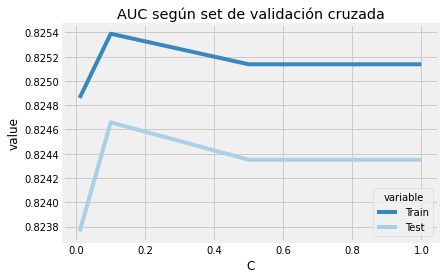

In [12]:
C_list = [i for i in grid_search_svm_poly.cv_results_['param_C'].data]


mean_test_score_list = list(grid_search_svm_poly.cv_results_['mean_test_score'])
mean_train_score_list = list(grid_search_svm_poly.cv_results_['mean_train_score'])

svm_df = pd.DataFrame(list(zip(C_list,mean_train_score_list, mean_test_score_list)),
                                columns=['C','mean_train_score', 'mean_test_score'])

df_melt = svm_df.melt(id_vars=['C'],value_vars= ['mean_train_score','mean_test_score'])
df_melt.variable.replace({'mean_train_score':'Train',
                'mean_test_score':'Test'},inplace=True)

sns.lineplot(data=df_melt, x='C', y="value", hue="variable", palette ='Blues_r')
plt.title('AUC según set de validación cruzada')

plt.show()

In [13]:
param_grid = {
    'gamma': [0.001, 0.01, 0.1, 0.5]
}

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_svm_poly = GridSearchCV(SVC(random_state = seed
                                  , kernel='poly'
                                  )
                            ,param_grid=param_grid
                            ,scoring="roc_auc"
                            ,cv=kfold
                            ,n_jobs=-1
                            ,verbose=0
                            ,return_train_score=True)

grid_search_svm_poly.fit(X_train, y_train)

In [16]:
param_grid = {
    'C': [0.01, 0.1, 0.5, 1],
    'gamma': [0.001, 0.01, 0.1]
}

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_svm_poly = GridSearchCV(SVC(random_state = seed
                                  , kernel='rbf'
                                  )
                            ,param_grid=param_grid
                            ,scoring="roc_auc"
                            ,cv=kfold
                            ,n_jobs=-1
                            ,verbose=0
                            ,return_train_score=True)

grid_search_svm_poly.fit(X_train, y_train)

### Kernel rbf